Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [91]:
data = pd.read_csv('Fraud_check.csv')

In [92]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [93]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [94]:
data=data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)

In [95]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [96]:
d=[]

In [97]:
for i in data['Taxable_Income']:
  if i <= 30000 :
    d.append(0)
  else:
    d.append(1)

assighning RISKY as '0' and good as '1'

In [98]:
data['Taxable_Income']=d

In [99]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [100]:
data1 = pd.get_dummies(data,columns=['Undergrad','Urban'],drop_first=True)

In [101]:
data1.head()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES
0,Single,1,50047,10,0,1
1,Divorced,1,134075,18,1,1
2,Married,1,160205,30,0,1
3,Single,1,193264,15,1,1
4,Married,1,27533,28,0,0


In [102]:
data1 = pd.get_dummies(data1,columns=['Marital_Status'])

In [103]:
data1.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,50047,10,0,1,0,0,1
1,1,134075,18,1,1,1,0,0
2,1,160205,30,0,1,0,1,0
3,1,193264,15,1,1,0,0,1
4,1,27533,28,0,0,0,1,0


In [104]:
x = data1.iloc[:,1:]
y=data1[['Taxable_Income']]

In [105]:
x.head()

,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,50047,10,0,1,0,0,1
1,134075,18,1,1,1,0,0
2,160205,30,0,1,0,1,0
3,193264,15,1,1,0,0,1
4,27533,28,0,0,0,1,0


In [106]:
y.head()

,Taxable_Income
0,1
1,1
2,1
3,1
4,1


In [107]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Gini Criteria

In [108]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

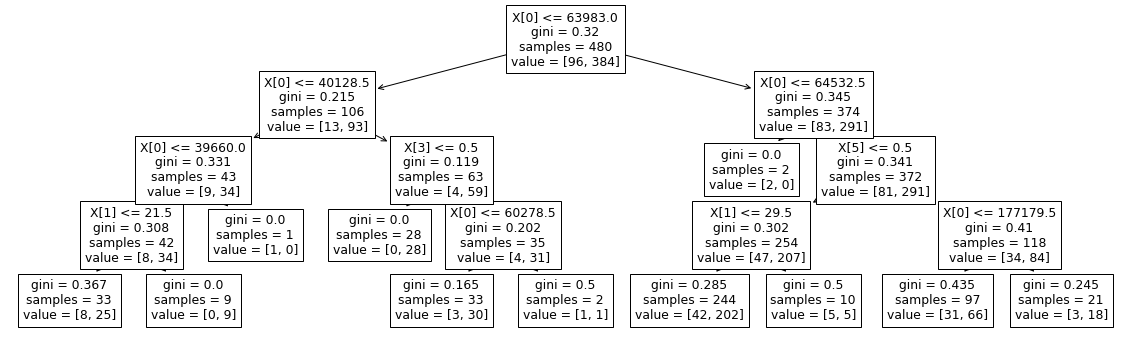

In [109]:
#PLot the decision tree
plt.figure(figsize=(20,6))
tree.plot_tree(model);
plt.show()

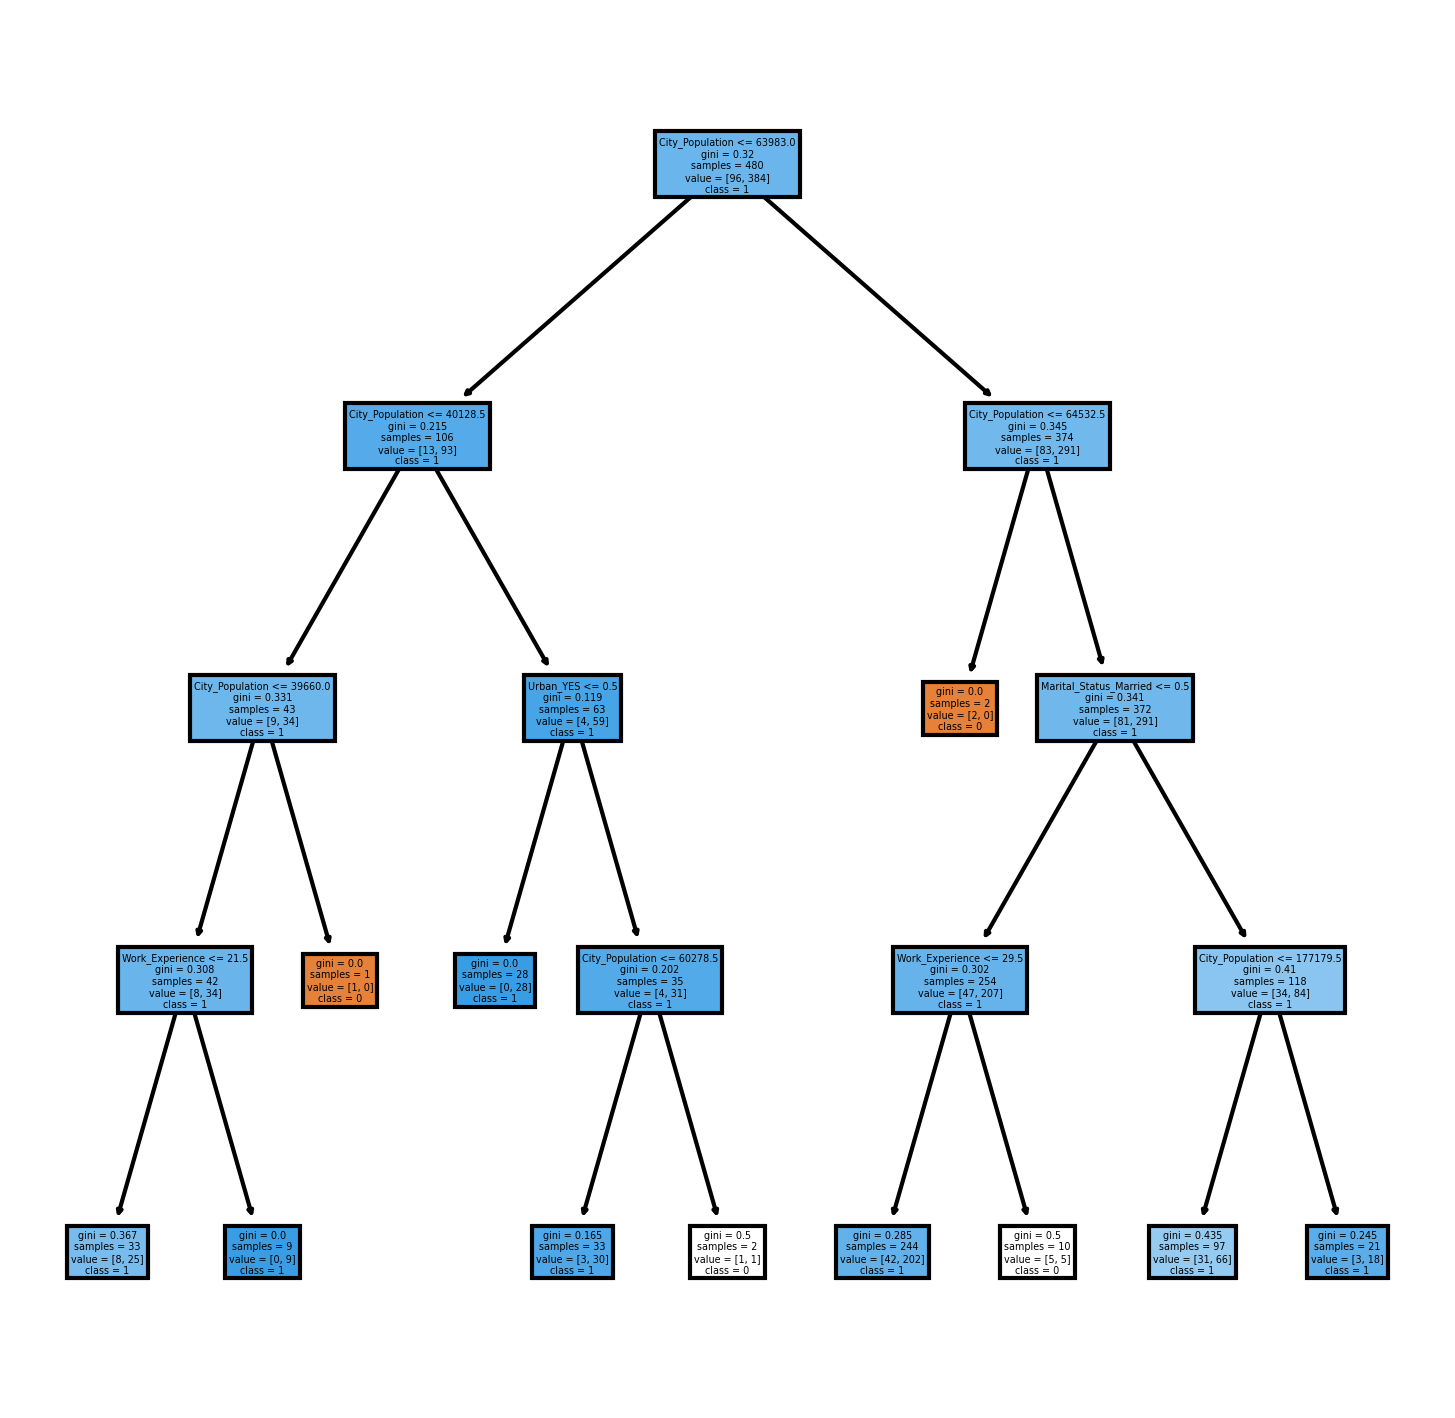

In [110]:
fn=['City_Population','Work_Experience','Undergrad_YES','Urban_YES','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [111]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    115
0      5
dtype: int64

In [112]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.7583333333333333

Building Decision Tree Classifier (CART) using Entropy Criteria

In [114]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [115]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [116]:
#Prediction and computing the accuracy
preds1=model_entropy.predict(x_test)
metrics.accuracy_score(preds1,y_test)

0.7666666666666667

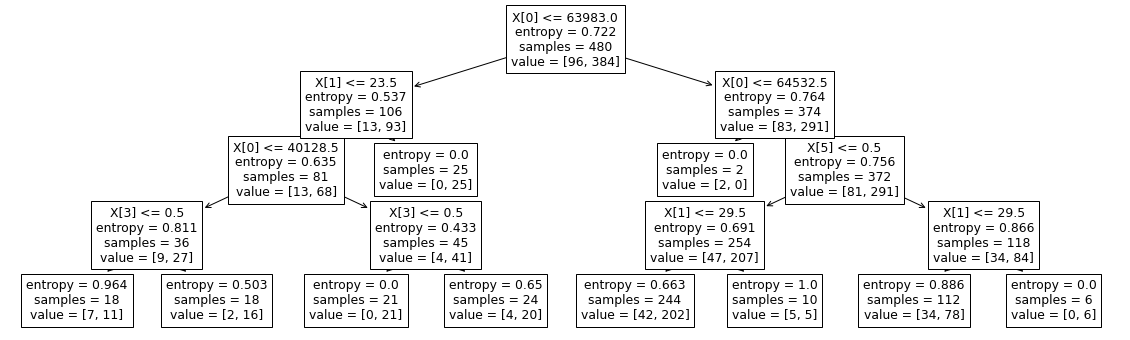

In [117]:
#PLot the decision tree
plt.figure(figsize=(20,6))
tree.plot_tree(model_entropy);
plt.show()

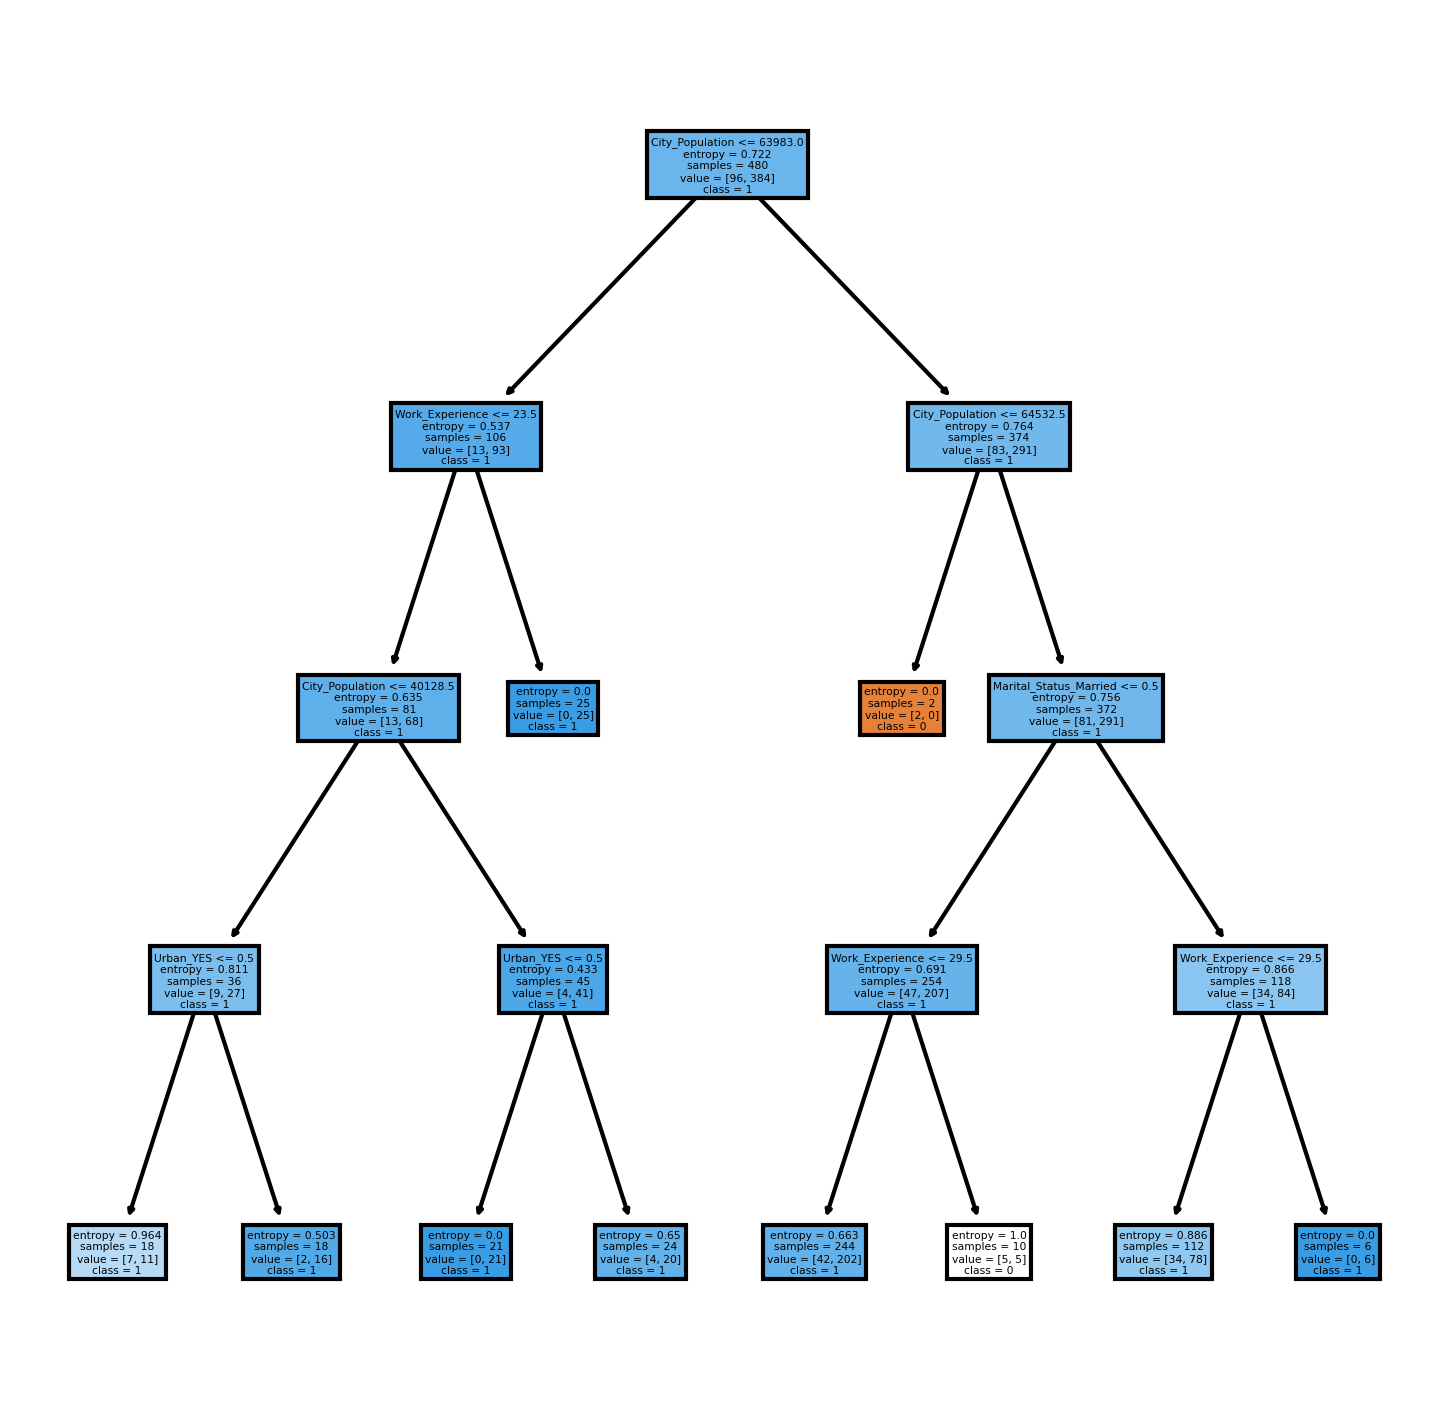

In [118]:
fn1=['City_Population','Work_Experience','Undergrad_YES','Urban_YES','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single']
cn1=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model_entropy,
               feature_names = fn1, 
               class_names=cn1,
               filled = True);

In [119]:
pd.Series(preds1).value_counts() # getting the count of each category 

1    118
0      2
dtype: int64